> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info(),
print('---------------------')
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

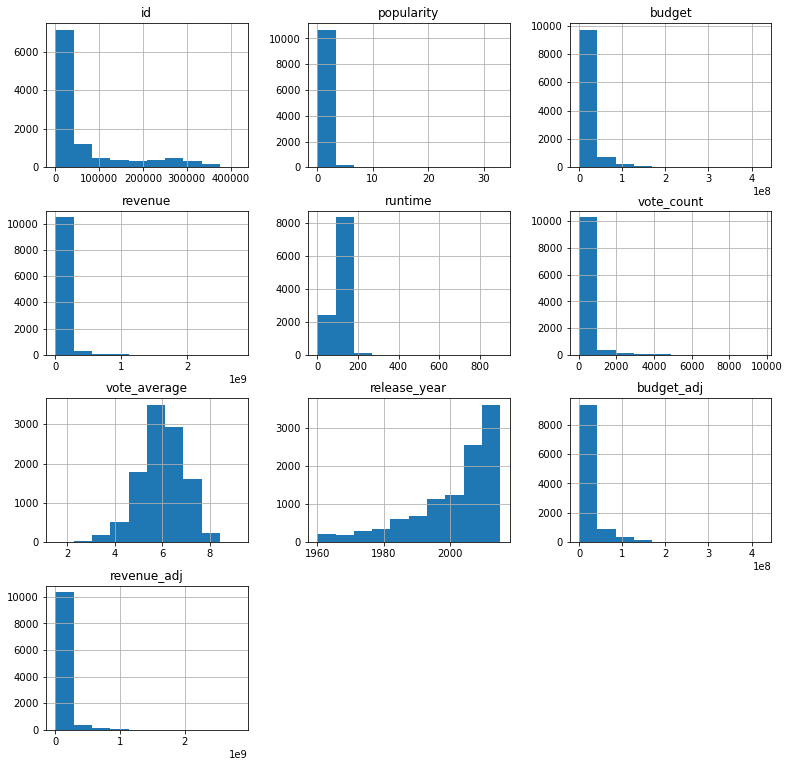

In [4]:
df.hist(figsize=(13,13));

In [5]:
print('---------------------')
df.describe()

---------------------


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [7]:
df_ca = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_di = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_ke = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_ge = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_pr = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking df_c if split was right
df_ca.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [8]:
df = df.join([df_ca, df_di, df_ke, df_ge, df_pr])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [9]:
#Checking if there are a duplicates
df.duplicated().sum()

0

In [10]:
#Checking if all rows contain right data
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

In [11]:
df['original_title'].value_counts().head()

The Three Musketeers    2
Clash of the Titans     2
Halloween               2
Halloween II            2
The Thing               2
Name: original_title, dtype: int64

In [12]:
# print numbers of columns and rows 
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataframe contains 1287 rows and 37 columns


###  Exploratory Data Analysis

### First, let's look at the Number of Movies Released Each Year.

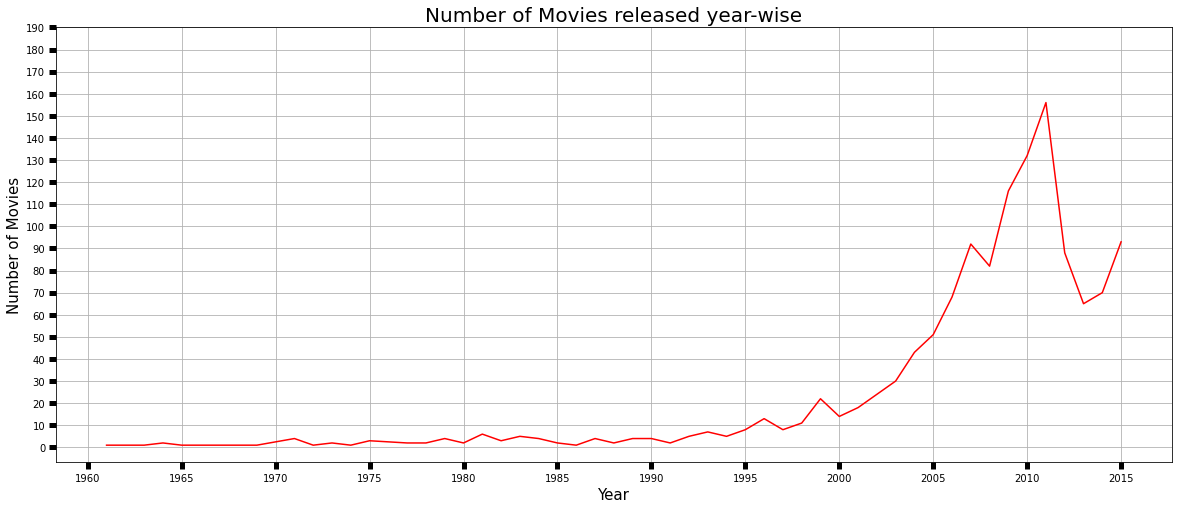

In [13]:
#Number of movies released year-wise
data = df.groupby('release_year').count()['original_title']

params = {'figure.figsize': (20, 8), 'axes.labelsize':15, 'axes.titlesize':20}
plt.rcParams.update(params)

data.plot(xticks=np.arange(1960, 2020, 5), yticks=np.arange(0, 200, 10), c='r')

plt.title('Number of Movies released year-wise')
plt.ylabel('Number of Movies')
plt.xlabel('Year')

plt.tick_params(which='both', width=5)
plt.tick_params(which='major', length=7)

plt.grid(True, which='both', axis='both')

plt.show()

FROM 1960 to 2015: 3100% growth rate around 56% growth rate Y-O-Y From 1960 -> 1980: It has increased about 340% From 1980 -> 2000: It increased 378% From 2000 -> 2015: It increased 92%

### Comparison of Budget, Revenue, Profit through the years

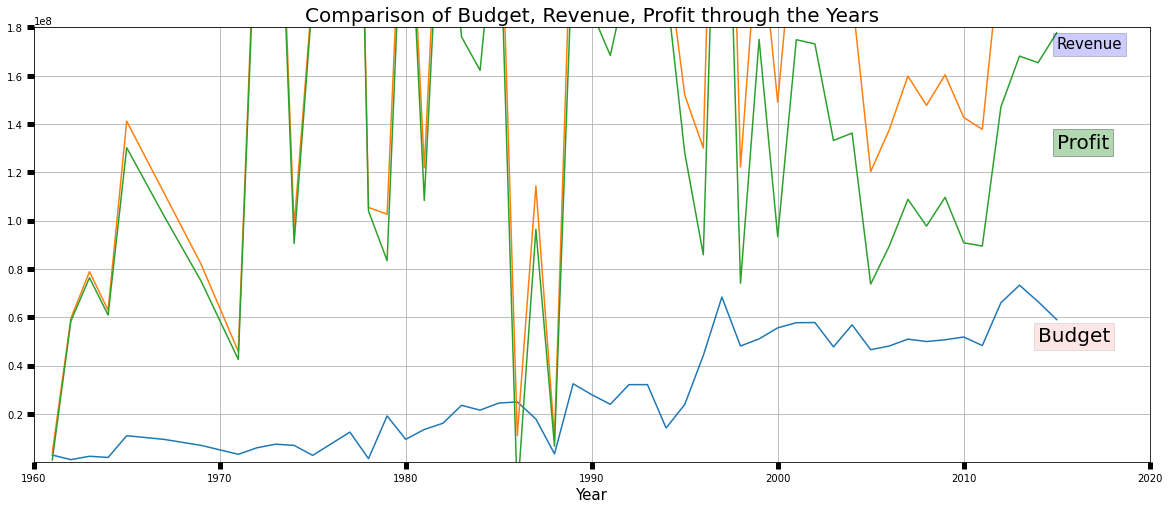

In [14]:
#Renaming Budget, Revenue columns based on assumption of currency and adding Profit, ROI columns 
df.insert(3, 'profit_US_dollars', (df['revenue'] - df['budget']))
df.insert(4, 'ROI', (df['profit_US_dollars']/df['budget']))
df.rename(columns = {'budget':'budget_US_dollars', 'revenue':'revenue_US_dollars'}, inplace = True)
(df.groupby('release_year')['budget_US_dollars']).mean().plot()
(df.groupby('release_year')['revenue_US_dollars']).mean().plot()
(df.groupby('release_year')['profit_US_dollars']).mean().plot()

params = {'figure.figsize': (20, 8), 'axes.labelsize':15, 'axes.titlesize':20}
plt.rcParams.update(params)
 
plt.title('Comparison of Budget, Revenue, Profit through the Years')
plt.xlabel('Year')

ax = plt.axis([1960, 2020, 1, 180000000])

plt.text(2015, 170000000, 'Revenue', verticalalignment='bottom', fontsize=15, bbox=dict(facecolor='blue', alpha=0.2))
plt.text(2015, 130000000, 'Profit', fontsize=20, bbox=dict(facecolor='green', alpha=0.3))
plt.text(2014, 50000000, 'Budget', fontsize=20, bbox=dict(facecolor='red', alpha=0.1))

plt.tick_params(which='both', width=5)
plt.tick_params(which='major', length=7)

plt.grid(True, which='both', axis='both')

plt.show()

### Research Question 1  (Which genres are most popular from year to year?)

In [15]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
# Adding release year to df_genres
df_genres_dates = df_genres.join(df['release_year'])
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = []


In [16]:
#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Comedy,Comedy,Equal
1,1962,Action,Adventure,Not equal
2,1963,Thriller,Action,Not equal
3,1964,Music,Adventure,Not equal
4,1965,Action,Adventure,Not equal
5,1967,Thriller,Action,Not equal
6,1969,Action,Adventure,Not equal
7,1971,Thriller,Action,Not equal
8,1972,Drama,Drama,Equal
9,1973,Thriller,Drama,Not equal


In [17]:
df_most_popular['is_equal'].value_counts()


Not equal    42
Equal         9
Name: is_equal, dtype: int64

### How does Popularity and Revenue depend on Runtime?




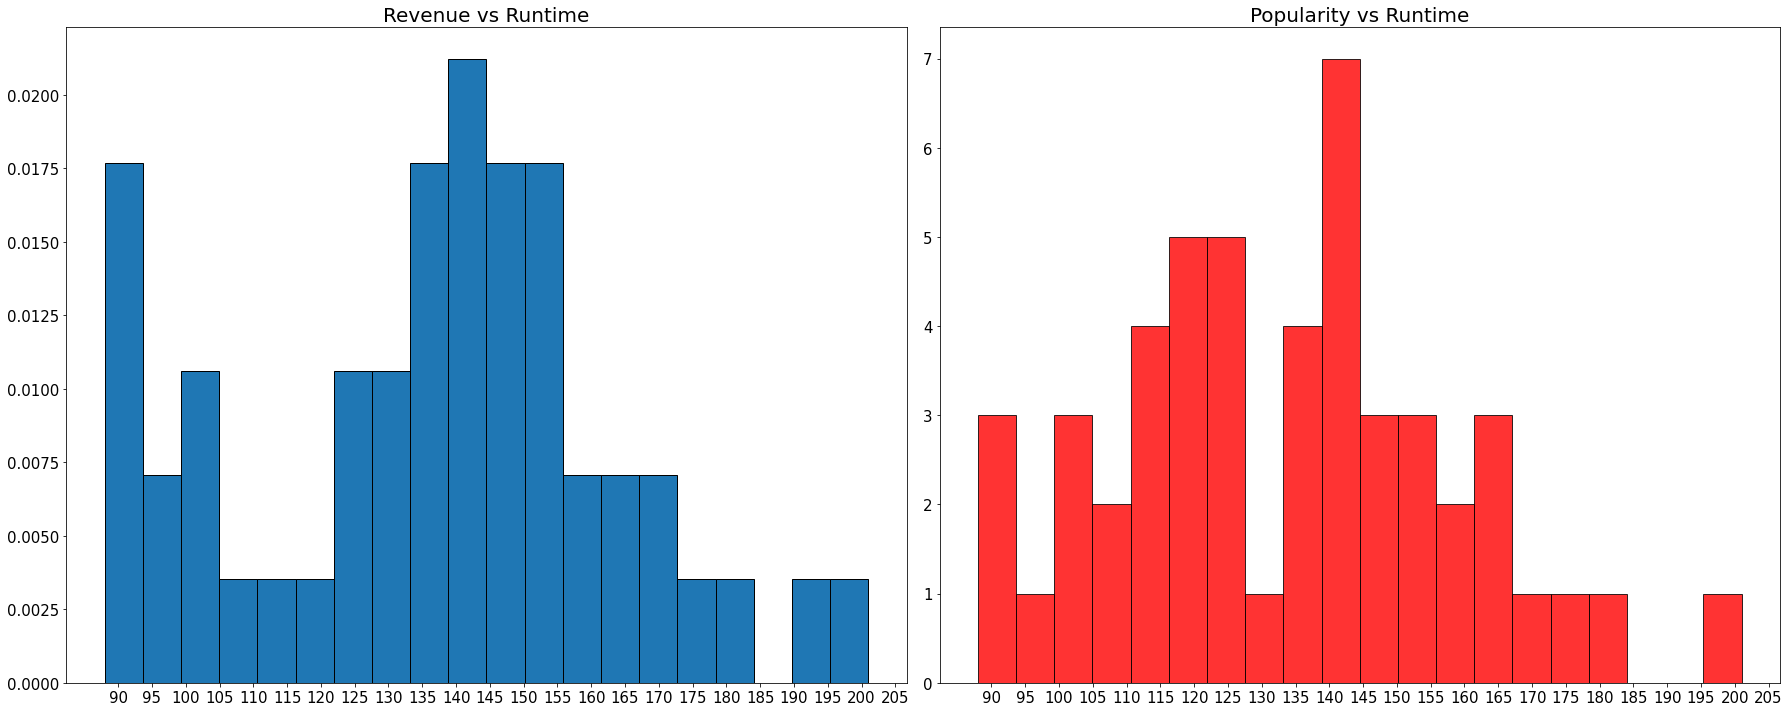

In [18]:

test5 = df.sort_values(by='popularity', ascending=False).head(50)
test6 = df.sort_values(by='revenue_US_dollars', ascending=False).head(50)

params = {'figure.figsize': (25, 10), 'axes.labelsize':15, 'axes.titlesize':20}
plt.rcParams.update(params)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False)

ax1.hist(test6.runtime, bins=20, density=True, edgecolor="k")
ax1.set_title('Revenue vs Runtime')

ax2.hist(test5.runtime, bins=20, color='Red', alpha=0.8, edgecolor="k")
ax2.set_title('Popularity vs Runtime')

plt.sca(ax1)
ax1.grid(False)
plt.yticks(fontsize=15)
plt.xticks(np.arange(90, 210, 5), fontsize=15)

plt.sca(ax2)
ax2.grid(False)
plt.yticks(fontsize=15)
plt.xticks(np.arange(90, 210, 5), fontsize=15)

plt.tight_layout()

plt.show()






In [19]:
 #Here we will create a new dataframe using Melt function to compare Genres Stats'

gen_cols = ['genres_1','genres_2', 'genres_3', 'genres_4', 'genres_5']
non_gen_cols = ['popularity', 'ROI', 'budget_US_dollars', 'revenue_US_dollars', 'profit_US_dollars', \
                'vote_count', 'vote_average', 'runtime', 'release_year']
gen_types = df.melt(id_vars=non_gen_cols, value_vars=gen_cols, var_name='gen_type', value_name='type')


C:\Users\Osama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Osama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


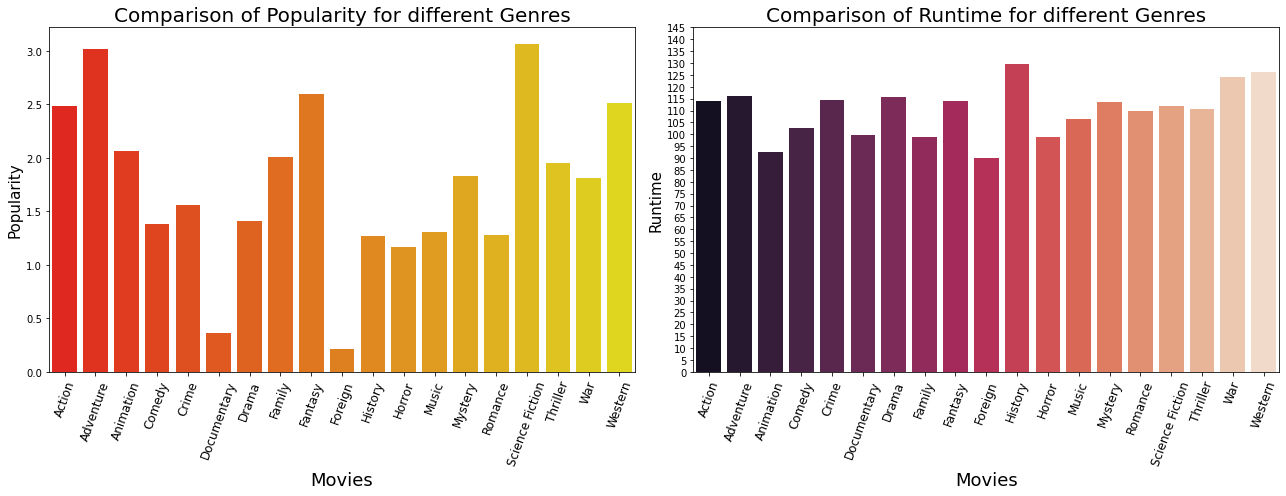

In [20]:
a = gen_types.groupby('type')['popularity'].mean()
b = a.index

c = gen_types.groupby('type')['runtime'].mean()
d = c.index

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [18,7], sharex=True)

sns.barplot(b, a, ax=ax[0], palette='autumn')
sns.barplot(d, c, palette='rocket')

plt.sca(ax[0])
plt.xticks(fontsize=12, rotation=70)
plt.title('Comparison of Popularity for different Genres')
plt.xlabel('Movies', fontsize=18)
plt.ylabel('Popularity')

plt.sca(ax[1])
plt.xticks(fontsize=12, rotation=70)
plt.yticks(np.arange(0, 150, 5))
#Smaller Yticks were considered to better compare for trends
plt.title('Comparison of Runtime for different Genres')
plt.xlabel('Movies', fontsize=18)
plt.ylabel('Runtime')

plt.tight_layout()
plt.show()



### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)


In [21]:
# Creating a copy of the original DataFrame
df_revenue = df

In [22]:
#Performing basic statistic in order to create 4 classifications of the revenue_adj
df_revenue['revenue_adj'].describe()

count    1.287000e+03
mean     1.991775e+08
std      2.968515e+08
min      4.300000e+01
25%      2.764890e+07
50%      8.674770e+07
75%      2.351178e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [23]:
#Bin_edges correspond to min - max entries in previous cell. Quantiles are lables by bin_names.
#new column 'revenue_level' is created to classify columns based on revenues

bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [24]:

#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [25]:
#nested dictionary is created with 8 attributes based on revenue_levels

movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()
        #cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        #production companies
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()
        #release_year
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [26]:
#transforming nested dictionary into dataframe

movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                           117.541339
         frequent_director                Steven Spielberg
         avg_budget                        95442930.571087
         avg_vote                                 6.518701
         frequent_cast                   Samuel L. Jackson
         frequent_genres                            Action
         release_year                                 2011
         frequent_production_companies  Universal Pictures
low      avg_duration                           105.008032
         frequent_director                  John Carpenter
         avg_budget                        25129745.415168
         avg_vote                                  6.16988
         frequent_cast                       Colin Farrell
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies  Universal Pictures
medium   avg_duration                           107.825826
         frequent_director               Mikael HÃ¥fstrÃ¶m
         avg_budget                        39912951.344076
         avg_vote                                 6.167267
         frequent_cast                       Jason Bateman
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies        Warner Bros.
very low avg_duration                           102.020408
         frequent_director                    Rian Johnson
         avg_budget                         10380165.23947
         avg_vote                                 5.985204
         frequent_cast                          Ellen Page
         frequent_genres                             Drama
         release_year                                 2010
         frequent_production_companies           Lionsgate

In [27]:

df_revenue.corr()

,id,popularity,budget_US_dollars,profit_US_dollars,ROI,revenue_US_dollars,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.189301,-0.050921,-0.023688,-0.010276,-0.031441,-0.013123,0.059368,0.004985,0.494397,-0.116021,-0.102211
popularity,0.189301,1.000000,0.432791,0.582064,-0.021494,0.594755,0.322390,0.744088,0.355904,0.059243,0.419863,0.549299
budget_US_dollars,-0.050921,0.432791,1.000000,0.569160,-0.045039,0.706888,0.337373,0.583038,0.075168,0.179160,0.985112,0.566835
profit_US_dollars,-0.023688,0.582064,0.569160,1.000000,-0.003509,0.983914,0.346323,0.754078,0.325682,-0.012674,0.580845,0.919085
ROI,-0.010276,-0.021494,-0.045039,-0.003509,1.000000,-0.012804,-0.034866,-0.022393,-0.034153,-0.000091,-0.046930,-0.009774
revenue_US_dollars,-0.031441,0.594755,0.706888,0.983914,-0.012804,1.000000,0.371226,0.775374,0.296501,0.028022,0.713706,0.913802
runtime,-0.013123,0.322390,0.337373,0.346323,-0.034866,0.371226,1.000000,0.426505,0.385210,-0.071863,0.361985,0.371980
vote_count,0.059368,0.744088,0.583038,0.754078,-0.022393,0.775374,0.426505,1.000000,0.464812,0.071290,0.572798,0.703183
vote_average,0.004985,0.355904,0.075168,0.325682,-0.034153,0.296501,0.385210,0.464812,1.000000,-0.163737,0.088272,0.322503
release_year,0.494397,0.059243,0.179160,-0.012674,-0.000091,0.028022,-0.071863,0.071290,-0.163737,1.000000,0.056174,-0.228469


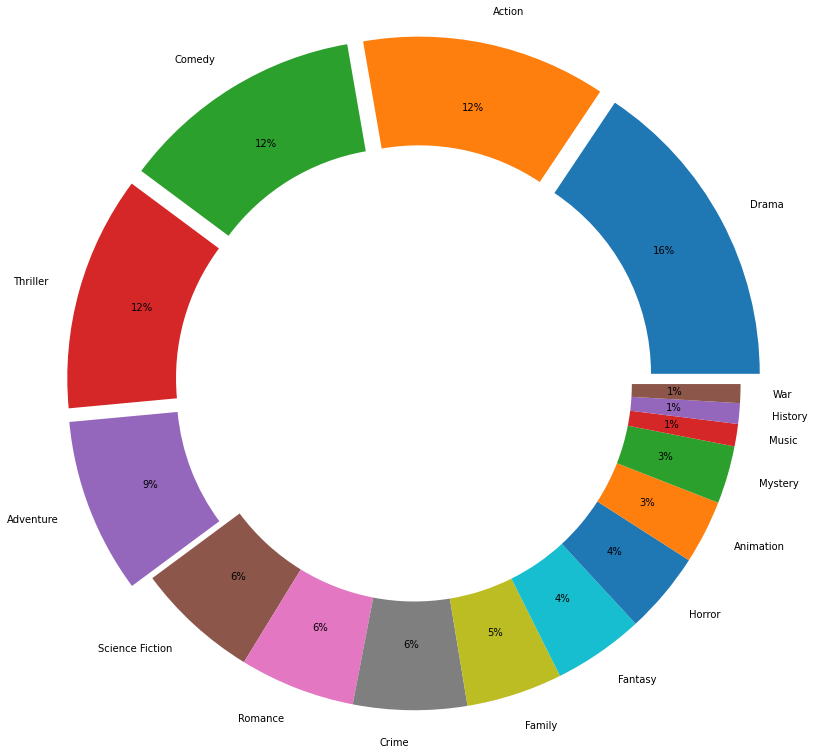

In [28]:
labels = gen_types['type'].value_counts()[:16].index
sizes = gen_types['type'].value_counts()[:16]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, radius=1.5, explode=explode, labels=labels, labeldistance = 1.1, pctdistance=0.8, \
         wedgeprops=dict(width=0.5), startangle=0, autopct='%1.0f%%', shadow=False)

plt.show()


 
Percentage for every genre of movie

it shows some stats as follows :

bigger percentages genre was (Drama, Action, Comeday, Thirller)

Smallest percentages was (War, History, Music)


### Top 10 Movies across different Parameters


In [29]:

def top10(val):
    
    info = (df[val].sort_values(ascending=False)).head(10)
    
    arr = []
    for i in info.index.values:
        arr.append((df['original_title'][i], info[i]))
    
    arr = pd.DataFrame(arr)
        
    choose = {'popularity':'red', 'budget_US_dollars':'green', 'revenue_US_dollars':'blue', \
            'profit_US_dollars':'magenta', 'runtime':'purple', 'vote_count':'orange', 'ROI':'violet'}
    title = {'popularity':"Popularity", 'budget_US_dollars':'Budget', 'revenue_US_dollars':'Revenue', \
            'profit_US_dollars':'Profit', 'runtime':'Runtime', 'vote_count':'Votes', 'ROI':'ROI'}
    
    ax = sns.barplot(x=arr[1], y=arr[0], data=arr, color = choose[val])
    
    sns.set(rc={'figure.figsize':(14, 5)})
    ax.set_title('Movies with Highest ' + title[val], fontsize = 15)
    ax.set_xlabel(title[val], fontsize = 18)
    ax.set_ylabel("Movies", fontsize = 18)
    ax.grid(False)
    sns.set_style("whitegrid")
    plt.show()

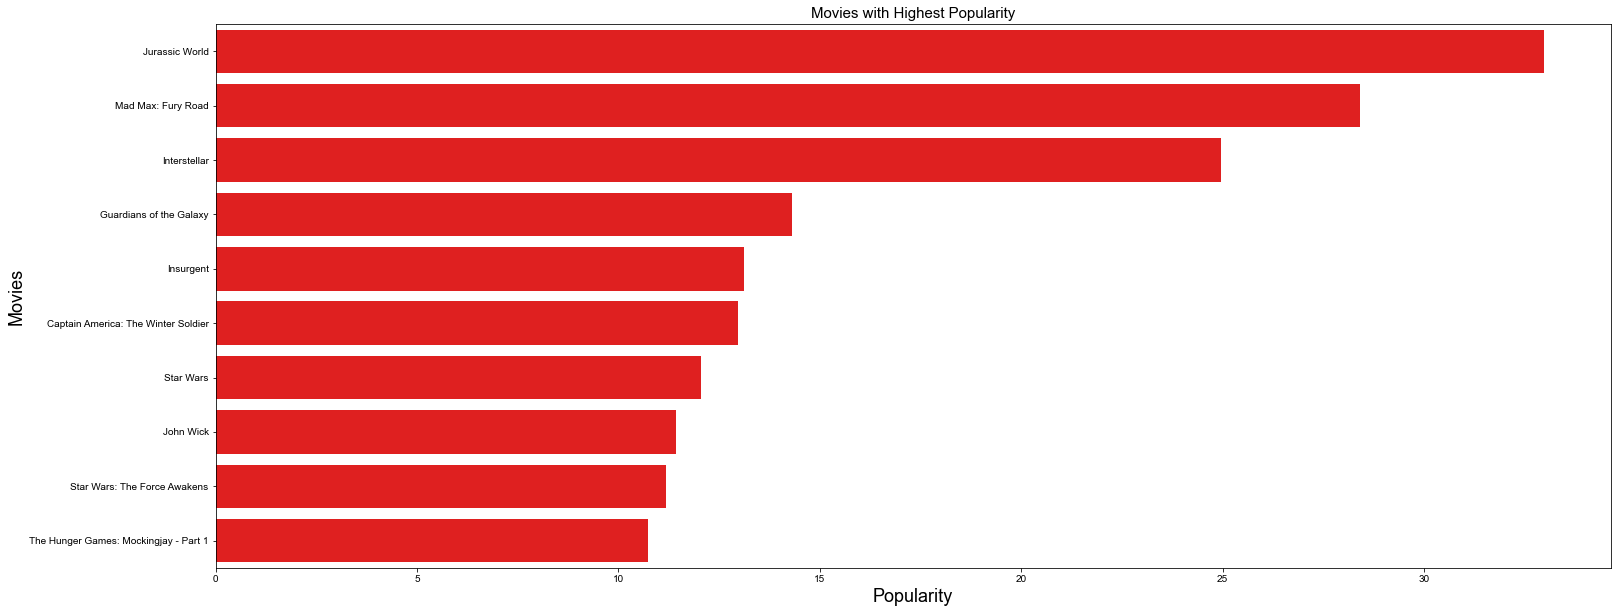

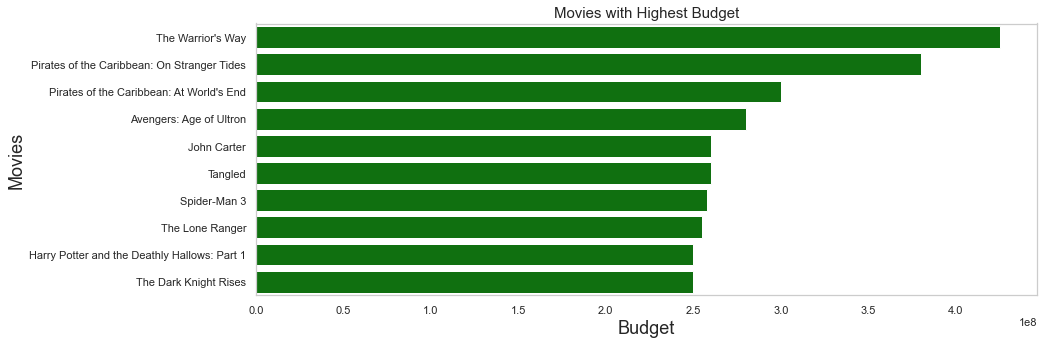

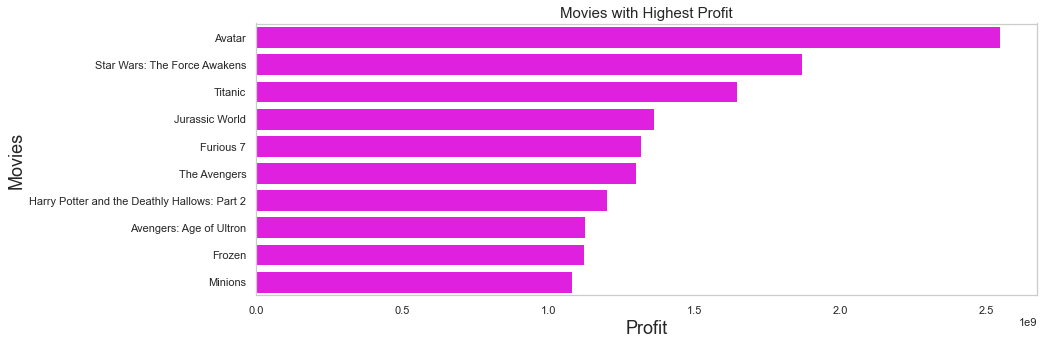

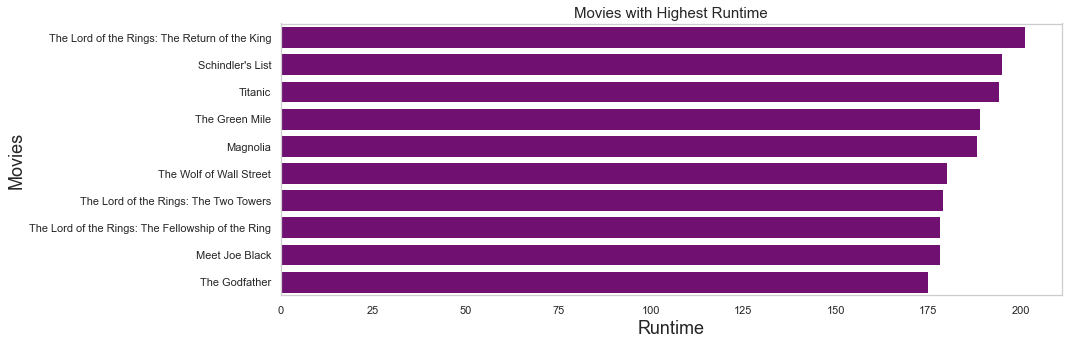

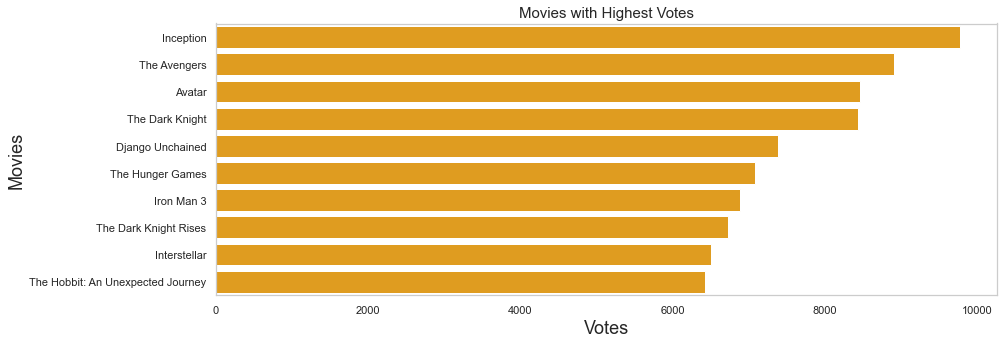

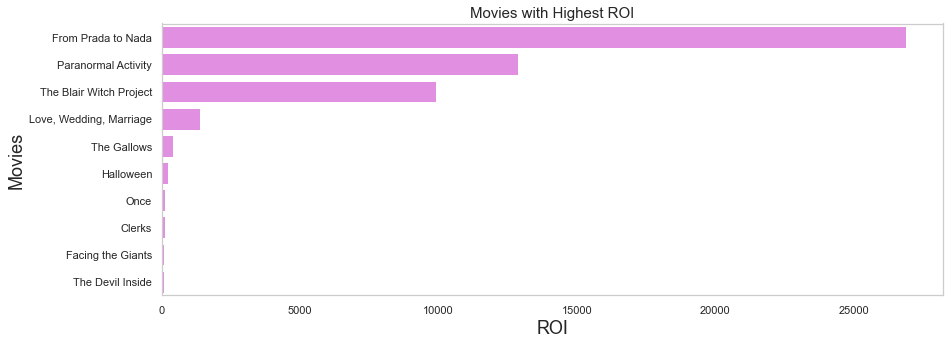

In [30]:
top10('popularity')
top10('budget_US_dollars')
top10('profit_US_dollars')
top10('runtime')
top10('vote_count')
top10('ROI')

 some movie stats for the movie buffs

Movie with Highest popularity --> Jurassic World --> 32

Movie with Lowest popularity --> Ricki and the Flash --> 0



Movie with Highest budget_US_dollars --> The Warrior's Way --> 425000000

Movie with Lowest budget_US_dollars --> Lost & Found --> 1



Movie with Highest profit_US_dollars --> Avatar --> 2544505847

Movie with Lowest profit_US_dollars --> The Warrior's Way --> -413912431


Movie with Highest runtime --> Carlos --> 338.0

Movie with Lowest runtime --> Kid's Story --> 15.0



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### About the first research question: genre showed a different results, the most popular genre differed a lot. also, only in 11 occasions the most frequent produced genres was also voted as best genre by the users. In all remaining 40 occasions the two values differed.

### From the two Histograms of Revenue vs Runtime and Popularity vs Runtime, it is clear that movies between runtime of 140-150mins brings the most moolah and movies between 140-145mins are the most popular.

So runtime seems to have a significant impact on Revenue and Popularity.

However, there’s a contradiction where movies between 115-125mins seem to be very popular among viewers but they are bringing very less revenue to producers.

If we look at the Avg. Runtime comparison of Movie Genres, we can see that the genres - War, History and Western fits the description of genres between 115-125 mins. Also, if we look at the popularity distribution of these genres, we can see that they are relatively quite popular.

Now if we compare the revenue brought in by these 3 genres, we can see all 3 genres score very low in Revenue. So, we might conclude that although Western, War and History movies are popular among viewers, they don’t bring as much revenue as they should.

### About the second research question:The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon, cast Tom Cruise as actor and contain the genre Action.

The plot of top 10 movies futher explores the movies based on different parameters.

Based on popularity index, most movies are recent releases with Jurassic World leading the table.

The movie with the highest budget i.e. The Warrior’s way is followed by mostly newer movies. Since overall, the budget figures are lesser for 2000-2015, it can be assumed that the movies in the list must have had a significant budget over their counter-parts to top the list.

The movie which made the highest profits are Avatar, Star wars and Titanic with 2 of those movies being directed by James Cameron.

The movie with the highest runtime can easily be considered epics with Carlos and Cleopatra having runtimes of 350 and 250mins approx respectively!

The movie with highest ROI is The karate Kid part2 which far surpasses its counterparts in that category.

Finally looking at the scatterplot of Revenue vs other important parameters, it is evident that Revenue strongly depends on Budget of the movies, their popularity, their Vote count and Runtime, a fact that was almost always evident almost throughout the entire study. The more the money spent on budget, promotions, film making, the more the revenue and profits. High revenue movies are always on the top popular list and vice-versa whereas there seems to be an optimal region of Runtime of movies where Revenue seems to be the maximum concentrated.

### Limitations

1- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

2- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

3- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.